## 개요 

참여중인 딥러닝 스터디 2주차 기록입니다.

## 1주차 과제 설명
* 큰 틀에서는 보통 아래의 순서로 진행
  * 데이터생성
  * hypothesis
  * cost function
  * optimizer
  * train
  * Prediction (=Inference)

* tf.reduce_mean() : 열(row)끼리의 평균

* Non-Linear Modeling <br>
  >$y = ax^2 + bx + c$

  * 구하고자 하는 값은 $a, b, c$
  * 모델 학습 전 임의의 값($a,b,c$)으로 추세선 긋기 <br>
  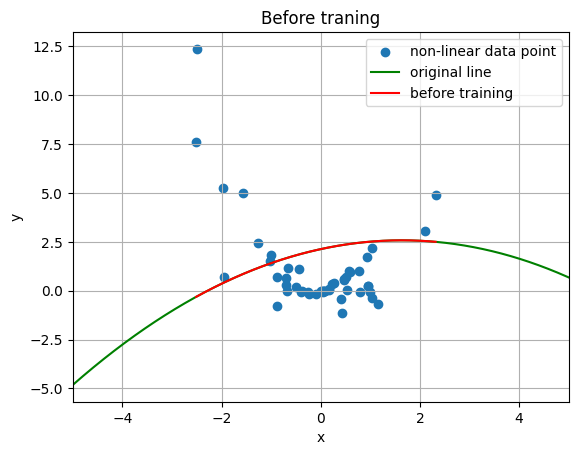
  * 내가 가정하는 식을 hypothesis에 넣고 학습
    ```python
    def hypothesis(x):
      return a*(x)**2 + b*x + c

    def cost_fn(pred_y, true_y):
      return tf.reduce_mean(tf.square(pred_y - true_y))

    optimizer = tf.optimizers.Adam(learning_rate = 0.01)

    def train():
      with tf.GradientTape() as g:
        pred = hypothesis(X)
        cost = cost_fn(pred, Y)

      gradients = g.gradient(cost, [a,b,c])                    # 기울기를 계산하는 부분
      optimizer.apply_gradients(zip(gradients, [a,b,c]))       # 계산된 기울기를 업데이트 해주는 부분

    for step in range(1,1001):
      train()

      if step % 100 == 0:
        pred = hypothesis(X)
        cost = cost_fn(pred, Y)
        print(f" step:{step} cost:{cost:.4f} a:{a.numpy()} b:{b.numpy()} c:{c.numpy()} ")
        line_x = np.arange(min(X), max(X), 0.001)
        line_y = a*(line_x)**2 + b*(line_x) + c
    ```
  * 모델 학습 후 변경된 추세선 확인하기 <br>
  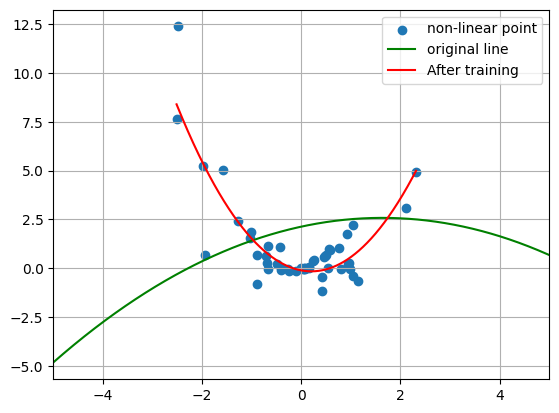

## Linear Regression

* Linear Regression의 Motivation
  * 수 많은 데이터를 묘사하는 하나의 선을 긋고, 그 선으로 향후 추이(예를 들어 광고비와 매출의 관계 등)를 판단
  * 랜덤하게 하나의 선을 긋고(임의의 W, b설정), 실제 데이터(점)과 선(예측값)의 거리[오차]를 줄인다

* 선형성이 있다는 가정 하에 모델링 수행
  > $Y = B_0 + B_1X + \epsilon$
  * 기존 수업의 $Y = WX+b$ 식에서 $B_0$이 $b$, $B_1X$이 $W$
    * $B_0$ : `intercept` (첫번째 기울기는 $B_1X$으로 표현)
    * $B_1X$ : `slope`, `coefficients`
    * $B_0$, $B_1X$ 등을 합쳐서 `parameter`라고 부름
      (가장 적절한 parameter를 찾는 것이 AI의 목적)

* hat ($\hat{B}$)은 최적화가 되었을 때 씌운다
  * 처음에 임의값을 두었다가 학습을 하며 최적화가 되면 씌움

* residual(잔차)
  * 예측값 $\hat{y}$($\hat{B}_0+\hat{B}_1x_i$)에 대해 정의된 오차 $e_i$ ($y_i-\hat{y_i}$)
    * i번째 잔차($i$th residual)
* RSS(Residual Sum of Squares) : 잔차를 제곱해서 더한 것
  > $e_1^2 + e_2^2+...+e_n^2$
  * 제곱이 아닌 절대값으로 해도 개념적으로는 오차를 계산 가능
  * 최소자승법(least square)으로 최적의 $B$를 구하며 RSS가 줄어듦
    * 최소자승법 : 그래프에서 오차가 가장 낮은, 미분값이 0인 지점 찾기<br>(오차가 0이 되는 지점을 미분으로 찾는 것이며, **이때의 오차는 Train set의 오차임**)
    * 절대값으로 오차를 찾는 경우 미분을 활용할 수 없어, RSS를 사용
    * 현대에는 최소자승법을 잘 안쓰고 GD를 사용
      (GD : 하나의 랜덤한 점을 찍고, 최소점을 향해 근사를 반복해나감[epoch반복])

* $B_0$, $B_1X$ 등 parameter를 구했을 때, 얼마나 신뢰할 수 있는 숫자인가
  * Standard error(Variance에 루트를 씌우면 Standard error로, 본질적으로 같음)
    * Variance는 모델의 안정성
    * Standard error, $SE(\hat{B}_1)^2$ 계산을 통해 얼마나 안정적인지 판단
    * SE의 계산식은 데이터(샘플)가 많아질수록 분모(Sum)가 커지므로, 모델의 Variance가 낮아짐
      * → 데이터가 많아지면 모델이 좋아진다<br>
       **(최적의 $B$를 최소자승법으로 구해 모델을 만들고, 데이터 샘플의 수가 커지면 계산된 최적의 $B$가 가지는 SE가 줄어들음)**

  * Confidence intervals(신뢰구간)
    * 대학원 면접에서 많이 나오는 주제
    * Variance(또는 SE)를 기반으로 신뢰구간을 구함
      > $\hat{B}_1 +- 2*SE(\hat{B}_1)$
    * 신뢰구간 95% / 평균 100 / 신뢰구간 80~120의 해석
      * 모집단에서 샘플링을 했을 때 평균이 100
      * 모집단 평균이 105, 110일수도 있지만 추정한 신뢰구간안에 실제 평균이 존재할 확률이 95%라는 뜻
    * Variance가 낮아지면 신뢰구간이 좁아지며 좋아짐

* t-statistic
  * $ t = \hat{B}_1-0 \over SE(\hat{B}_1) $
  * SE가 낮을수록 좋은 값이라는 점에서, 위 수식(t값)이 클수록 좋다는 직관적 이해 가능
  * p-value : t값보다 클 확률 (즉 낮을수록 좋다)

* 결과 표 보며 이해하기 <br>
  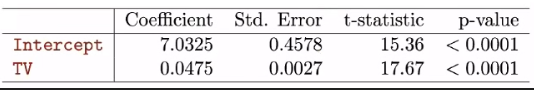
  * coefficient : 구한 parameter값
  * Standard error, t-statistic은 단위에 따라 달라질 수 있는 값
  * p-value는 통일된 값으로, 0.0001보다 작으므로 Variance가 낮고 모델이 안정적이다
    (p-value가 낮을수록 결과가 유의하다 라고 표현)

* $R^2$
  * $ R^2$ = $ TSS - RSS \over TSS $ = $1 - RSS \over TSS $
  * RSS(오차의 제곱을 모두 더한 잔차)가 클수록 작아지므로, 클수록 좋은 지표임을 이해
  * TSS는 RSS보다 무조건 크므로, $R^2$는 0~1의 값을 갖는다
  * $R^2$가 0.7이면 70%의 설명력을 가진다

* 주의할 점
  * 상관관계에 대해 분석한 것으로, `인과관계가 아니다`
    (인과관계라면 상관관계는 있을 수 있다)

## Multiple Regression

* 변수와 계수를 추가하면 Multiple Regression이 됨
  * 수식이 길어지고, * 편미분이 여러개가 나오게 되는 차이
  * 변수가 2개가 되어 기존의 `2차원평면/regression line`이 아닌 `3차원평면/regression plain`이 나옴
  * multiple matrix를 활용해 표현 (row, column)
  * RSS도 행렬식으로 표현
    * `역행렬은 엄청난 연산이 필요한데, 이는 least square를 사용하지 않게된 이유`임
    (정형데이터 위주였던 과거와 달리 이미지 등 데이터와 이에 대한 행렬이 매우 커져, computing성능발전에도 역행렬 계산 어려워짐)
    * `least square는 Bias를 최소화하는 방법인데, trade-off로 Variance커질 위험이 커서 사용하지 않게 됨`
      * 현대는 모델의 Variance가 중요해짐. **Overfitting과 관계된 Variance를 줄이기 위해 약간의 Bias상승은 감내**
      * Least square(최소자승법)는 오차가 0이되는 지점을 미분으로 찾는 방법이며, 이때의 오차는 Train Dataset으로 오차가 너무 작아지면 Overfitting

* Correlation 상관관계
  * Variable간의 상관관계를 보는 이유 : 중복되는 변수의 과대평가, 타 변수의 과소평가를 방지
    (예를 들어 연봉과 자산의 경우 상관관계가 있음)

* GD(Gradient Descent, 경사하강법)
  * 역행렬의 계산량문제로 최소자승법(least square)가 아닌 GD방식을 사용
  * $a$ (learning rate)로 적절히 작은 숫자를 곱해, 한번에 너무 많이 이동(하강)하지 않게 함
    * 보통 0.01사용
  * $W = W - a * $ $ \partial c \over \partial W$
  * 코드로 이해하기 <br>
    (1) Cost를 가중치W로 미분 **(gradient 함수로 $ \partial c \over \partial W$구하기)**
    ```python
      # gradient 계산
      gradients = g.gradient(cost, [W,b])     
    ```
    (2) 가중치W 업데이트 **(apply_gradients 함수로 $W$ 업데이트)**
    ```python
      # gradients에 따라 W와 b 업데이트
      optimizer.apply_gradients(zip(gradients, [W,b])) 
    ```

* Single Regression에서는 없던 Multiple Regression의 고민
  * 변수의 갯수 (많이 쓴다고 좋은게 아니며, 최적의 갯수 찾기)
    * forward(↔backward) selection
      * 변수의 갯수를 늘려가다가(↔줄여가다가), 성능이 낮아질때 직전 갯수로 사용
    * 변수의 갯수가 달라졌을 때 성능의 지표
      * AIC(Akaike Information Criterion)
      * BIC(Bayesian Information Criterion)
      * Adjusted $R^2$
      * CV(Cross-validation)
  * 요즘은 Linear Regression에서 발전된 알고리즘이 많이 나와서, 위의 것보다 먼저 알아야 하는게 많음

* Qualitative Predictor(Categorical, 범주형 변수)
  * 숫자가 아닌 상태로 쓰이는 경우 (0남자 1여자 등, 여러개도 Okay) 활용하여 Regression에 반영할 수 있게 됨
    * 예를 들어, 구하고자하는 y가 키(신장)이라면, 성별변수 남자가 0이면 가중치는 음수, 반대면 양수가 될 수 있음

* Interaction impact(Synergy impact)
  * 변수가 구하고자하는 y가 아니라 다른 변수에도 영향을 미치는 경우
    * 서로 관계있는 두 변수를 곱하여 추가해줌($X^1, X^2$가 관계있는 경우 $X^1*X^2$라는 변수로)
    * 결과 표로 이해하기 <br>
      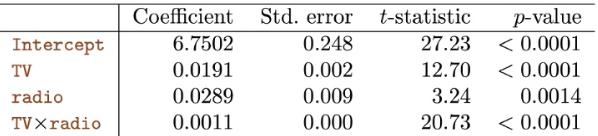
      * radio의 p-value가 유의하지 않아 변수제거를 했을 때, 파생변수인 radio*TV는 어떻게 할까?
        * 제거한다 (**오리지널 변수를 제거한다면 파생변수도 제거, 오리지널이 있을때만 사용가능**)
        * **Hierarchy principle : 파생변수가 존재하려면 오리지널 변수도 있어야 함**
      * Coefficient 값 기준으로 radio가 TV보다 더 중요한 변수인가?
        * Coefficient는 단위(unit)를 간과하므로, 높다고 해서 반드시 중요한 것은 아니다
  * 변수(feature)의 관계는 독립적인게 좋음

* Non-linearity의 Multiple regrssion 활용한 표현
  * 예를 들어 전반부는 정비례 / 후반부는 반비례 한다면
    * $B_1 *나이 + B_2 * 나이^2$ 와 같이 표현 가능
    * 위의 표현식은 변수의 독립성을 저해하는가?(사용해도 되나?)
      * 서로 다른관계를 묘사하는 것이라면 사용 가능
        * 연봉, 자산 모두 대출점수의 양의 상관관계라면 사용 불가
        * $B_1 *나이$는 양의 상관관계, $B_2 * 나이^2$는 음의 상관관계라면 사용 가능
  * 다만 변수가 많아지면 한계가 있으므로, **비선형에 적합한 타 모델이 더 좋음**

* 상관관계를 빠르게 파악하는 법 : 모든 산점도(Scatter plot)를 그려보기
  * 미리 파악하여 상관관계가 있는 것을 빼고 모델링하면 더 좋은 결과가 나타남
  * 중복변수가 들어가거나 하더라도, Robust한 모델을 사용하는 것도 좋은 방법

## Logistic regression

* Linear regression으로 현재까지 예측문제를 풀었다면, **Logistic regression으로는 분류문제를 풀 수 있다**
* 머신러닝으로 푸는 큰 3가지 문제 : 예측 vs 분류 vs 클러스터링
  * 분류 : 메일이 왔을 때 스팸인가 아닌가, 신용카드승인내역이 이상거래인가 정상거래인가

* Hyphothesis의 반영
  * 기존의 Linear regression($y=Wx+b$)의 식으로는 놓치는 case가 많이 생김
  * `Logistic(Sigmoid) function`을 활용하여 해결 가능 <br>
    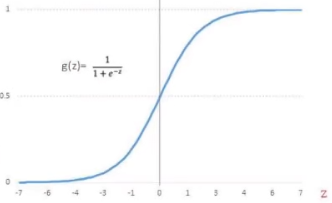
    * z가 아무리 커지거나 작아져도 0~1사이에서 벗어나지 않음
    * 0.5를 기준으로 판단가능 (Pass/Fail, 스팸/정상 등)
    * **z부분에 기존에 데이터를 학습했던 Linear regression식($y=Wx+b$)을 넣으면(plug-in), 분류문제를 푸는 함수로 바꿈**
    * 값이 0.7이 나온다면, Pass확률이 70%인 것으로 해석가능

* Descision boundary 경계영역
  * 예를 들어 2가지 Case를 분류하는 Linear Line이 있다면, 그것이 Descision boundary
    (Non Linear한 경우라도 분류문제를 풀 수 있고, 그 Line은 Descision boundary)

* Cost function에서는 문제가 생김
  * Sigmoid function으로 간편하게 분류문제를 푸는 함수로 바꿨지만, 기존처럼 미분을 하면 문제 발생
    * 값이 조금만 크거나 작아져도 기울기가 0이 됨 → 기존의 Mean Square방식 적용 불가 <br>
      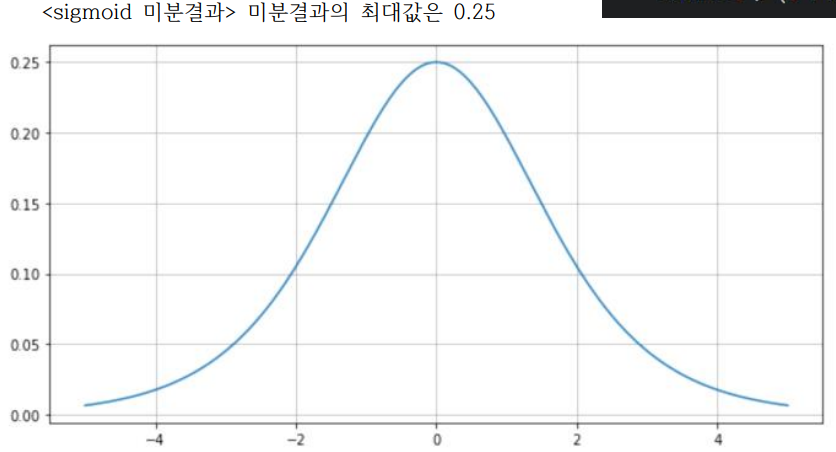
    * GD 사용시 최적 지점까지 가지 못하는 경우 발생
  * `Cross entropy`를 사용하게 됨
    ```
      [Cost function으로 사용되기 위한 2가지 조건]
      1. 클수록 나쁘고 작을수록 좋아야 함
      2. 미분이 가능해야 함
        (미분이 안되는 경우 : 평평한 부분이 있거나, 위아래로 변동이 큰 구간이 많은 경우)

      * 두 조건을 충족하는 것은 쉽지 않으며, Accuracy는 1번만 충족
      * Cross entropy는 위의 2개 조건을 모두 충족
    ```
    * 2가지 상황(y=0[pass], y=1[fail])에 대한 상황에 대해 다른 식 사용
      * 필요시 하나의 식으로도 나타낼 수 있음 (y값에 따라 한쪽 식이 0이 되는 형태)

    * 현대에서도 많이 쓰이는 함수인 Cross entropy (gpt4 등)
    * GD경사하강법으로도 사용 가능

## 모형예측(Classification)의 성과평가(Confusion matrix)

* Accuracy(정답률) : 실제값 중 맞춘 비율
  * 분류가 **Imbalance한 경우 한계**가 있음(신용카드 경우도 대다수가 정상거래)
    (예를 들어 암환자 비율이 90%이상일 때, 로직없이 그냥 암환자로만 판정해도 정답률 높음)

* Precision(암으로 판정한 사람 중, 실제로 암) vs Recall(실제 암인 사람 중, 암으로 판정된 사람)
  * 암환자를 정상환자로 판단하는 것은 치명적
  * 암과 같은 케이스는 기본적으로 암으로 '판단'하는 것이 많아져야하므로 Recall을 사용
    (분자가 '암 판정'인, 분자가 커질수록 점수가 높은 recall을 사용하는게 적절)
  * **프로젝트 특성에 따라 적합한 모델 뿐 아니라 적합한 지표를 사용하는 것이 중요**

* Precision이 더 중요한 케이스
  * 불량제품 하나를 검수하기 위해 1만개의 정상제품을 검사하면 비효율적
  * 1개의 불량제품을 감수하고 1만개를 살리는게 효율적

* **분류가 balance한지 imbalance한지를 체크**

* F1 score : Precision과 Recall의 조화평균

* Confusion matrix를 그래프로 visualize 해서 보여주면 더 설득에 용이